In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
vaccine = pd.read_csv('./files/COVID-19_Vaccinations_in_the_United_States_County.csv')
vaccine.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
0,09/07/2021,13123,36,Gilmer County,GA,10.1,3176,3176.0,11.6,3018,...,13.4,3416.0,13.4,1123.0,14.0,C,9,9,9,9
1,09/07/2021,12123,36,Taylor County,FL,29.8,6432,6432.0,34.4,6288,...,47.3,8580.0,49.6,3486.0,77.0,D,13,14,14,15
2,09/07/2021,12091,36,Okaloosa County,FL,44.3,93303,93301.0,52.2,89724,...,63.4,108126.0,66.0,32599.0,94.8,B,7,8,8,8
3,09/07/2021,16017,36,Bonner County,ID,34.3,15689,NaN,NaN,15661,...,NaN,17541.0,47.8,8041.0,69.2,A,2,NaN,3,3
4,09/07/2021,18173,36,Warrick County,IN,54.3,34203,34202.0,63.7,32025,...,68.8,34460.0,71.5,10739.0,95.3,A,4,4,4,4


In [4]:
vaccine = vaccine.iloc[:, [0, 4, 6, 14]]
vaccine.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,GA,3176,3677.0
1,09/07/2021,FL,6432,8840.0
2,09/07/2021,FL,93303,113256.0
3,09/07/2021,ID,15689,17574.0
4,09/07/2021,IN,34203,36974.0


In [5]:
vaccine_NY = vaccine[vaccine['Recip_State'] == 'NY']
vaccine_NY = vaccine_NY.reset_index()
del vaccine_NY['index']
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,NY,170942,189174.0
1,09/07/2021,NY,117390,125878.0
2,09/07/2021,NY,62077,67943.0
3,09/07/2021,NY,70291,75560.0
4,09/07/2021,NY,35338,38547.0


In [6]:
vaccine_NY['Date'] = pd.to_datetime(vaccine_NY['Date'])
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,2021-09-07,NY,170942,189174.0
1,2021-09-07,NY,117390,125878.0
2,2021-09-07,NY,62077,67943.0
3,2021-09-07,NY,70291,75560.0
4,2021-09-07,NY,35338,38547.0


In [7]:
vaccine_NY = vaccine_NY.groupby('Date').sum()
vaccine_NY.head()

,Series_Complete_Yes,Administered_Dose1_Recip
Date,,
2020-12-13,0,0.0
2020-12-14,0,0.0
2020-12-15,0,0.0
2020-12-16,0,228.0
2020-12-17,1,2183.0


In [8]:
vaccine_NY['Total population'] = 20400000
vaccine_NY['Percemt of complete'] = (vaccine_NY['Series_Complete_Yes']/vaccine_NY['Total population'])*100
vaccine_NY['Percemt of Dose1'] = (vaccine_NY['Administered_Dose1_Recip']/vaccine_NY['Total population'])*100
vaccine_NY.tail()

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
Date,,,,,
2021-09-03,11785885,13204029.0,20400000,57.773946,64.725632
2021-09-04,11812282,13236154.0,20400000,57.903343,64.883108
2021-09-05,11836015,13260012.0,20400000,58.019681,65.000059
2021-09-06,11855109,13280583.0,20400000,58.113279,65.100897
2021-09-07,11868703,13299568.0,20400000,58.179917,65.193961


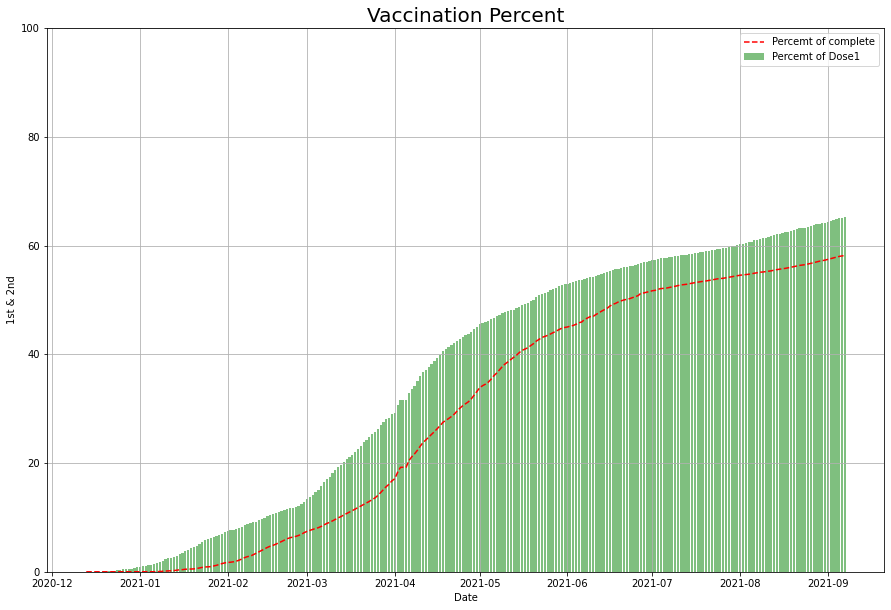

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Percemt of complete']
y2 = vaccine_NY['Percemt of Dose1']

ax.plot(x, y1, 'r--')
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g', alpha=0.5)
plt.ylim(0, 100)
plt.title('Vaccination Percent', fontsize=20)
plt.legend(['Percemt of complete', 'Percemt of Dose1'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()

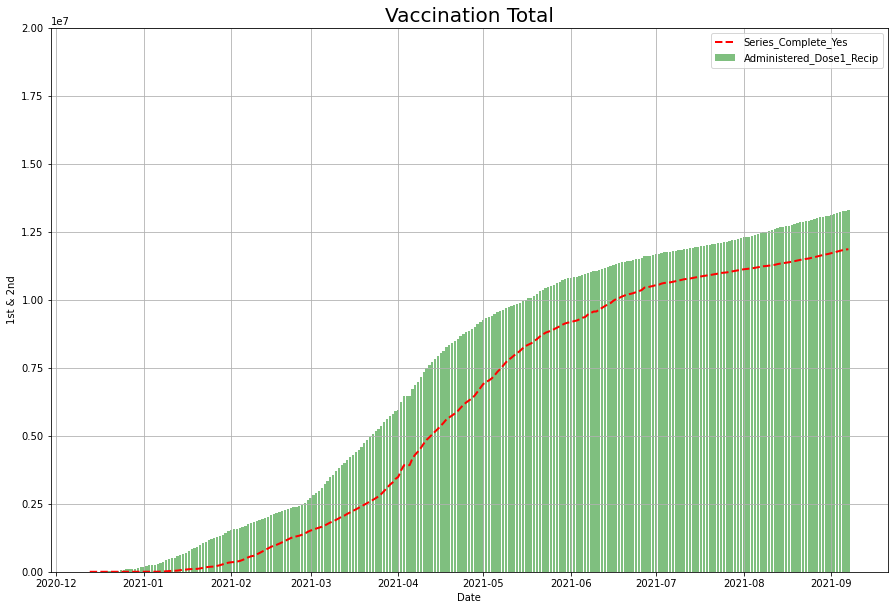

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Series_Complete_Yes']
y2 = vaccine_NY['Administered_Dose1_Recip']

ax.plot(x, y1, 'r--', linewidth=2)
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g', alpha=0.5)
plt.ylim(0, 20000000)
plt.title('Vaccination Total', fontsize=20)
plt.legend(['Series_Complete_Yes', 'Administered_Dose1_Recip'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()

In [11]:
columns = ['State', 'Date', 'New Cases']
ny_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = nyc_cases[nyc_cases['New Cases'] != 0]
ny_cases = ny_cases[ny_cases['New Cases'] != 0]

ny_total = pd.merge(ny_cases, nyc_cases, on='Date', how='inner')
ny_total['New Cases Sum'] = ny_total['New Cases_x'] + ny_total['New Cases_y']
ny_total.rename(columns = {'New Cases_x' : 'New York (Exclude NYC) New Cases', 'New Cases_y': 'New York City New Cases'}, inplace = True)

ny_total['Date'] = pd.to_datetime(ny_total['Date'])
ny_total = ny_total.sort_values(by="Date")
ny_total = ny_total.set_index('Date')
ny_total.head()

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-05,New York,11,New York City,1,12
2020-03-06,New York,9,New York City,5,14
2020-03-07,New York,7,New York City,3,10
2020-03-09,New York,97,New York City,7,104
2020-03-10,New York,12,New York City,21,33


In [12]:
ny_total = ny_total.resample(rule='M').last()
ny_total.head()

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-31,New York,3612,New York City,3623,7235
2020-04-30,New York,2044,New York City,2757,4801
2020-05-31,New York,558,New York City,655,1213
2020-06-30,New York,284,New York City,218,502
2020-07-31,New York,359,New York City,312,671


In [13]:
vaccine_NY_M = vaccine_NY.resample(rule='M').last()
vaccine_NY_M.head()

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
Date,,,,,
2020-12-31,487,162338.0,20400000,0.002387,0.795775
2021-01-31,336219,1488264.0,20400000,1.648132,7.295412
2021-02-28,1471039,2635409.0,20400000,7.210975,12.918672
2021-03-31,3415965,5903738.0,20400000,16.744926,28.939892
2021-04-30,6767658,9193774.0,20400000,33.174794,45.067520


In [14]:
n1 = len(ny_total) - len(vaccine_NY_M)
zero_v = pd.DataFrame([[0, 0, 0, 0, 0]]*n1, columns=vaccine_NY_M.columns)
zero_v

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0


In [15]:
columns = vaccine_NY.columns
v = pd.concat([zero_v, vaccine_NY_M],  ignore_index=True)
v

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0.0,0,0.000000,0.000000
1,0,0.0,0,0.000000,0.000000
2,0,0.0,0,0.000000,0.000000
3,0,0.0,0,0.000000,0.000000
4,0,0.0,0,0.000000,0.000000
5,0,0.0,0,0.000000,0.000000
6,0,0.0,0,0.000000,0.000000
7,0,0.0,0,0.000000,0.000000
8,0,0.0,0,0.000000,0.000000
9,487,162338.0,20400000,0.002387,0.795775


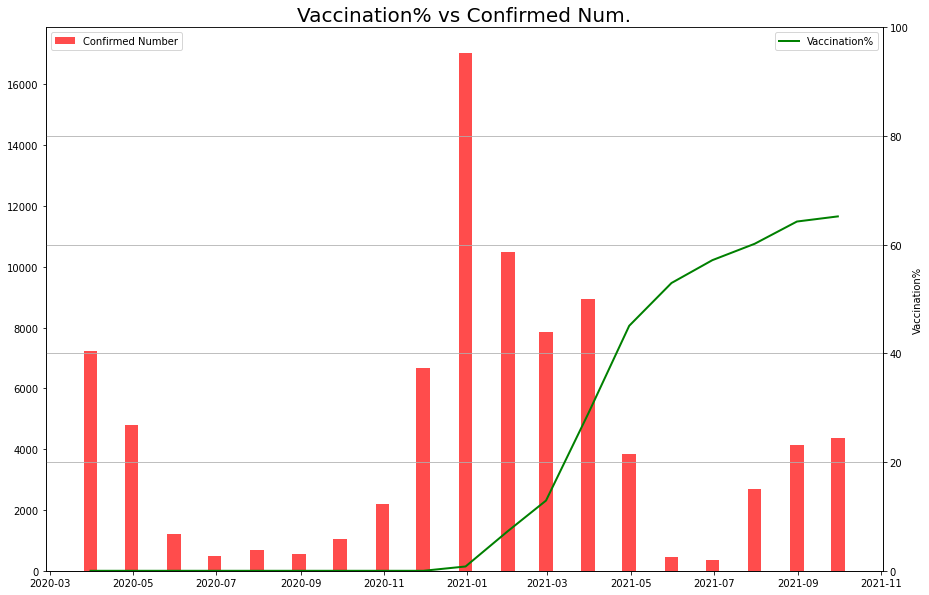

In [16]:
x = ny_total.index
y1 = ny_total['New Cases Sum']
y2 = v['Percemt of Dose1']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Confirmed Number', alpha=0.7, width=10)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Vaccination%', linewidth=2)
ax2.legend(loc='upper right')
ax2.set_ylim([0, 100])

plt.title('Vaccination% vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Vaccination%')
plt.grid()

In [17]:
us_deaths_sex_age = pd.read_csv('files/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv',usecols=['Year','State','Month','Sex','Age Group','COVID-19 Deaths','Group'],index_col=None)
ny_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])
nyc_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])

nyc_deaths = nyc_deaths[nyc_deaths['New Deaths'] != 0]
ny_deaths = ny_deaths[ny_deaths['New Deaths'] != 0]
ny_total_deaths = pd.merge(ny_deaths, nyc_deaths, on='Date', how='inner')

ny_total_deaths['New Deaths Sum'] = ny_total_deaths['New Deaths_x'] + ny_total_deaths['New Deaths_y']
ny_total_deaths.rename(columns = {'New Deaths_x' : 'New York (Exclude NYC) New Deaths', 'New Deaths_y': 'New York City New Deaths'}, inplace = True)
ny_total_deaths['Date'] = pd.to_datetime(ny_total_deaths['Date'])
ny_total_deaths = ny_total_deaths.set_index('Date')

ny_total_deaths = ny_total_deaths.sort_values(by="Date")
ny_total_deaths.head()

,State_x,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
Date,,,,,
2020-03-19,New York,4,New York City,11,15
2020-03-20,New York,10,New York City,24,34
2020-03-21,New York,6,New York City,27,33
2020-03-22,New York,3,New York City,50,53
2020-03-23,New York,7,New York City,50,57


In [18]:
ny_total_deaths = ny_total_deaths.resample(rule='M').last()
ny_total_deaths.head()

,State_x,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
Date,,,,,
2020-03-31,New York,56,New York City,353,409
2020-04-30,New York,175,New York City,259,434
2020-05-31,New York,30,New York City,51,81
2020-06-30,New York,7,New York City,12,19
2020-07-31,New York,4,New York City,5,9


In [19]:
n2 = len(ny_total_deaths) - len(vaccine_NY_M)
zero_v2 = pd.DataFrame([[0, 0, 0, 0, 0]]*n2, columns=vaccine_NY_M.columns)
zero_v2

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0


In [20]:
columns = vaccine_NY_M.columns
v2 = pd.concat([zero_v2, vaccine_NY_M],  ignore_index=True)
v2

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0.0,0,0.000000,0.000000
1,0,0.0,0,0.000000,0.000000
2,0,0.0,0,0.000000,0.000000
3,0,0.0,0,0.000000,0.000000
4,0,0.0,0,0.000000,0.000000
5,0,0.0,0,0.000000,0.000000
6,0,0.0,0,0.000000,0.000000
7,0,0.0,0,0.000000,0.000000
8,0,0.0,0,0.000000,0.000000
9,487,162338.0,20400000,0.002387,0.795775


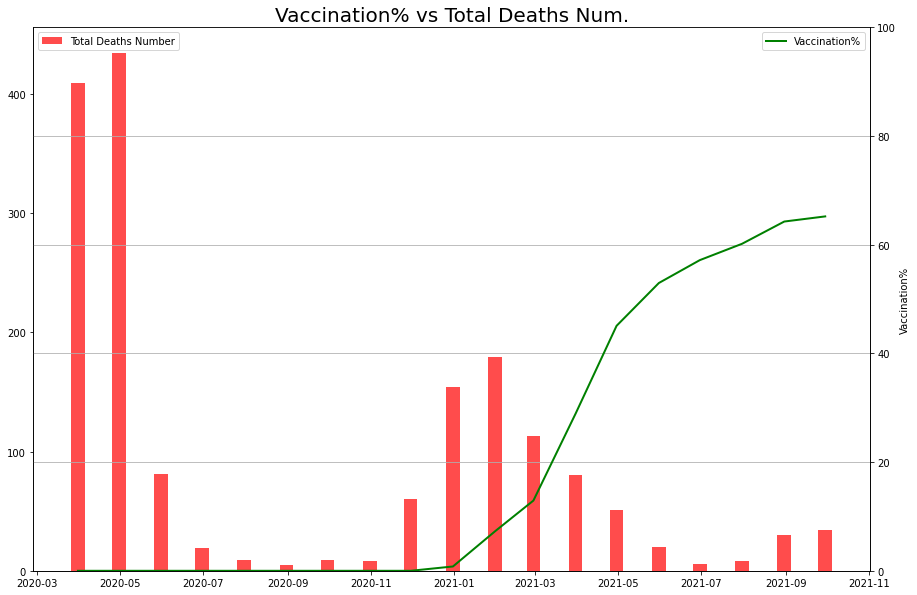

In [21]:
x = ny_total_deaths.index
y1 = ny_total_deaths['New Deaths Sum']
y2 = v2['Percemt of Dose1']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Total Deaths Number', alpha=0.7, width=10)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Vaccination%', linewidth=2)
ax2.legend(loc='upper right')
ax2.set_ylim([0, 100]) 

plt.title('Vaccination% vs Total Deaths Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Deaths Number')
plt.ylabel('Vaccination%')
plt.grid()

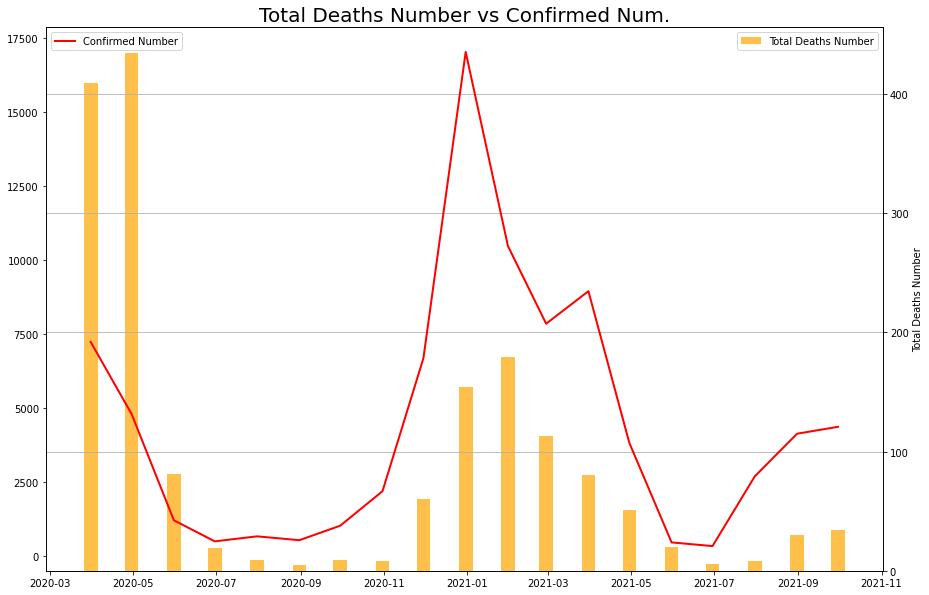

In [22]:
x = ny_total.index
y1 = ny_total['New Cases Sum']
y2 = ny_total_deaths['New Deaths Sum']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='r', label='Confirmed Number', linewidth=2)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='orange', label='Total Deaths Number', alpha=0.7, width=10)
ax2.legend(loc='upper right')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.title('Total Deaths Number vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Total Deaths Number')
plt.grid()

In [27]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)


C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
taxi_total = pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi20 = taxi_total.loc[['2020yr'], ['passenger_count']]
taxi20 = taxi20.iloc[2:]
taxi20

passenger_count
       Month                 
2020yr 3             230152.0
       4              27436.0
       5              36938.0
       6              47702.0
       7              53381.0
       8              59516.0
       9              62946.0
       10             68920.0
       11             62505.0
       12             58752.0

In [43]:
ny_total20 = ny_total.iloc[:10]
ny_total20

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-31,New York,3612,New York City,3623,7235
2020-04-30,New York,2044,New York City,2757,4801
2020-05-31,New York,558,New York City,655,1213
2020-06-30,New York,284,New York City,218,502
2020-07-31,New York,359,New York City,312,671
2020-08-31,New York,388,New York City,153,541
2020-09-30,New York,554,New York City,476,1030
2020-10-31,New York,1350,New York City,846,2196
2020-11-30,New York,4315,New York City,2370,6685


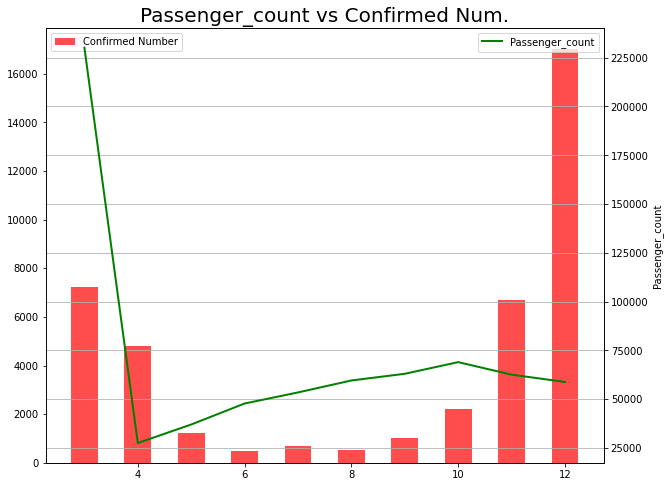

In [61]:
x = range(3, 13, 1)
y1 = ny_total20['New Cases Sum']
y2 = taxi20['passenger_count']

plt.rcParams['figure.figsize'] = (10, 8)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Confirmed Number', alpha=0.7, width=0.5)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Passenger_count', linewidth=2)
ax2.legend(loc='upper right')

# ax1.set_zorder(ax2.get_zorder() + 10)
# ax1.patch.set_visible(False)

plt.title('Passenger_count vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Passenger_count')
plt.grid()
plt.show()